In [14]:
# Daniel Bandala @ apr 2022
import numpy as np
import torch
import matplotlib.pyplot as plt
from self_attention_cv import ViT

from self_attention_cv.transunet import TransUnet
from self_attention_cv import MultiHeadSelfAttention
from self_attention_cv.bottleneck_transformer import BottleneckBlock



In [5]:
# TransUnet model
x = torch.rand(2, 3, 128, 128)
model = TransUnet(in_channels=3, img_dim=128, vit_blocks=8,
vit_dim_linear_mhsa_block=512, classes=5)
y = model(x) # [2, 5, 128, 128]
print('Shape of output is: ', y.shape)
print('-'*70)
print('Output corresponding to the first image \n')
print(y.detach().numpy()[0][0]) 

Shape of output is:  torch.Size([2, 5, 128, 128])
----------------------------------------------------------------------
Output corresponding to the first image 

[[ 0.02560051 -0.0327327  -0.21482566 ...  0.20456748  0.12617958
   0.17806344]
 [ 0.3395365   0.04527678  0.22833365 ...  0.5967971   0.5220963
   0.38900724]
 [ 0.08967081 -0.2620221   0.11637592 ... -0.09488967 -0.13193482
   0.06604679]
 ...
 [ 0.3573861   0.18649498  0.39514983 ...  0.68592423  0.6195352
   0.39634508]
 [-0.12038266  0.06364146  0.13262096 ...  0.42853248  0.38549906
   0.76707494]
 [ 0.30367246  0.08855693  0.04767809 ...  0.2354723   0.09976843
   0.55121195]]


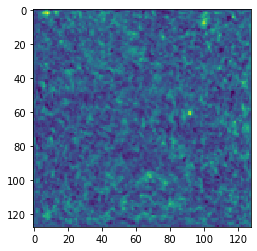

In [7]:
plt.imshow(y.detach().numpy()[0][0])

In [24]:
# multihead attention modules
model = MultiHeadSelfAttention(dim=64)
x = torch.rand(16, 10, 64)  # [batch, tokens, dim]
mask = torch.zeros(10, 10)  # tokens X tokens
mask[5:8, 5:8] = 1
y = model(x, mask)
print('Shape of output is: ', y.shape)
print('-'*70)
print('Output corresponding to the first token/patch in the first batch \n')
print(y.detach().numpy()[0][0]) 

Shape of output is:  torch.Size([16, 10, 64])
----------------------------------------------------------------------
Output corresponding to the first token/patch in the first batch 

[ 0.37031385  0.07337271  0.12279124  0.18229334  0.31409135 -0.10857455
  0.19474927  0.07013931 -0.23941371  0.15897024 -0.12715109 -0.00768698
  0.08268373 -0.00753425  0.1053901  -0.22068316 -0.2296289   0.07401869
 -0.41488332  0.21854007 -0.09398325  0.21307425 -0.20911108  0.30404776
  0.14803594 -0.02671951  0.04723959 -0.06921615  0.11346795 -0.34097627
  0.0299447  -0.00596842  0.10574413  0.18549342  0.25388226  0.32660946
  0.08539215  0.03752767 -0.0281278   0.01034914  0.1490625   0.35211483
 -0.1092601   0.16744412  0.20793755 -0.09462349 -0.2246584  -0.05999401
  0.27565616  0.29808572 -0.18142976 -0.03043424  0.09817013 -0.07519717
  0.02706591 -0.14126495  0.11208087 -0.12011972  0.09342317 -0.38581866
 -0.0859252  -0.2108738  -0.01799044 -0.00524588]


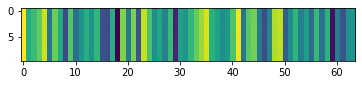

In [25]:
plt.imshow(y.detach().numpy()[0])

In [18]:
# bottleneck attention block
x = torch.rand(1, 512, 32, 32)
bottleneck_block = BottleneckBlock(in_channels=512, fmap_size=(32, 32), heads=4, out_channels=1024, pooling=True)
y = bottleneck_block(x)
print('Shape of output is: ', y.shape)
print('-'*70)
print('Output corresponding to the first patch in the first head, first batch \n')
print(y.detach().numpy()[0][0][0]) 

forward.. torch.Size([1, 512, 32, 32])
Shape of output is:  torch.Size([1, 1024, 16, 16])
----------------------------------------------------------------------
Output corresponding to the first patch in the first head, first batch 

[ 1.1467242  -1.0153974   1.9738808   2.2869675  -1.4787999  -0.21412578
  1.6603453   1.1264935  -1.3052719   0.20891945 -2.131237    0.04975832
  0.5961338   2.060142   -0.33932078 -0.24751678]


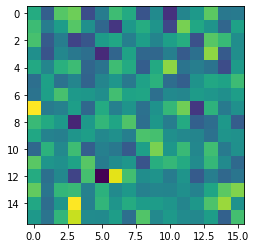

In [23]:
plt.imshow(y.detach().numpy()[0][0])

In [15]:
# basic vision transformer
model = ViT(img_dim=256, in_channels=3, patch_dim=16, num_classes=10,dim=512)
x = torch.rand(2, 3, 256, 256)
y = model(x) # [2,10]
print('Shape of output is: ', y.shape)
print('-'*70)
print('Output corresponding to the first image \n')
print(y.detach().numpy()[0]) 

Shape of output is:  torch.Size([2, 10])
----------------------------------------------------------------------
Output corresponding to the first image 

[ 0.26755583 -0.92634696 -0.05236667 -0.3829352   0.6074009   0.44980836
  0.12967715  0.61233443 -0.68448454 -0.6307271 ]


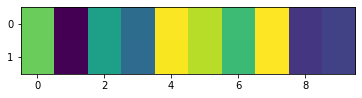

In [17]:
plt.imshow(y.detach().numpy())